### Importing Required Libraries
In this cell, we import the necessary Python libraries for data manipulation, text processing, machine learning, and model saving:
- `numpy` and `pandas` for data manipulation.
- `TfidfVectorizer` for text vectorization.
- `train_test_split` for splitting the data into training and testing sets.
- `LogisticRegression` for building the model.
- `accuracy_score` for evaluating model performance.
- `joblib` for saving and loading the model and vectorizer.


In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import joblib



### Loading the Dataset
In this cell, we load the dataset from a CSV file:
- `df = pd.read_csv('RomanUrduDataset.csv')`: Reads the dataset.
- `df.drop("Unnamed: 0", axis=1, inplace=True)`: Removes any unnecessary columns, such as index columns.

The dataset contains sentences in Roman Urdu and their corresponding sentiment labels.


In [2]:
# Load dataset
df = pd.read_csv('RomanUrduDataset.csv')
df.drop("Unnamed: 0", axis=1, inplace=True)


### Loading Stopwords
Here, we load a set of stopwords from a CSV file, which will be used during text preprocessing to remove commonly occurring but unimportant words in the text.
- `stopwords = set(pd.read_csv('RomanUrduStopwords.csv', header=None)[0])`: Loads the stopwords into a set.


In [3]:
import re
import string

# Load stopwords
stopwords = set(pd.read_csv('RomanUrduStopwords.csv', header=None)[0])

### Preprocessing Function
This function is used to clean and preprocess the text data:
- Converts text to lowercase.
- Removes punctuation and numbers.
- Removes stopwords from the text.

The `preprocess_text` function is then applied to each sentence in the dataset to clean the text data before feeding it into the machine learning model.


In [4]:
# Preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(f"[{string.punctuation}0-9]", " ", text)
    text = " ".join(word for word in text.split() if word not in stopwords)
    return text

# Apply preprocessing to the text data
df['clean_text'] = df['Sentences'].apply(preprocess_text)

### Defining Features and Labels
In this cell, we define the features (input data) and labels (target data):
- `X_text`: The cleaned text data from the column `clean_text`.
- `y`: The sentiment labels from the column `Labels`.


In [5]:
# Define features and labels
X_text = df['clean_text']
y = df['Labels']


### Vectorizing the Text and Splitting the Data
In this cell, we convert the text data into numerical features using `TfidfVectorizer`:
- `X = tfidf.fit_transform(X_text)`: Converts the text into a TF-IDF matrix.

We then split the data into training and testing sets using `train_test_split` to evaluate the model's performance.


In [6]:
# Text vectorization using TfidfVectorizer
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(X_text)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Training the Model and Evaluating Performance
In this cell:
- We initialize a logistic regression model with `max_iter=1000` to ensure convergence.
- The model is trained using the training data (`X_train`, `y_train`).
- The training and testing accuracy scores are computed and printed to evaluate the model's performance.

Finally, the trained model and vectorizer are saved using `joblib` for later use.


In [20]:
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)
print(f"Training Data Accuracy: {train_accuracy*100} %")
print(f"Testing Data Accuracy: {test_accuracy*100} %")

# Save the model and vectorizer
joblib.dump(model, 'logistic_regression_model.pkl')
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

print("Model and vectorizer saved successfully.")

Training Data Accuracy: 89.75487115021998 %
Testing Data Accuracy: 74.58100558659217 %
Model and vectorizer saved successfully.


### Loading the Model and Vectorizer
In this cell, we load the saved model and vectorizer from disk using `joblib.load`:
- `model = joblib.load('logistic_regression_model.pkl')`: Loads the logistic regression model.
- `vectorizer = joblib.load('tfidf_vectorizer.pkl')`: Loads the TF-IDF vectorizer.


In [8]:
# Load the model and vectorizer
model = joblib.load('logistic_regression_model.pkl')
vectorizer = joblib.load('tfidf_vectorizer.pkl')


### Testing the Model with Custom Text
Here, we test the trained model on some custom input texts:
- The custom texts are preprocessed using the `preprocess_text` function.
- The cleaned texts are transformed into numerical features using the loaded TF-IDF vectorizer.
- Predictions are made using the trained model.

For each custom text, we print the text along with the predicted sentiment label (Positive, Negative, or Neutral).


In [9]:
custom_texts = ["mujhe ye pasand ha", "Ali ne wo ghalat kaam kiya.", "Kia haal ha?"]

custom_texts_cleaned = [preprocess_text(text) for text in custom_texts]

X_custom = vectorizer.transform(custom_texts_cleaned)

predictions = model.predict(X_custom)

for text, prediction in zip(custom_texts, predictions):
    print(f"Text: {text} -> Predicted Label: {prediction}")



Text: mujhe ye pasand ha -> Predicted Label: pos
Text: Ali ne wo ghalat kaam kiya. -> Predicted Label: neg
Text: Kia haal ha? -> Predicted Label: Neutral


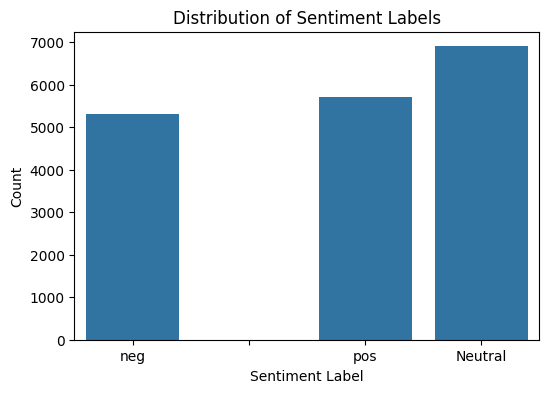

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot label distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Labels')
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment Label')
plt.ylabel('Count')
plt.show()


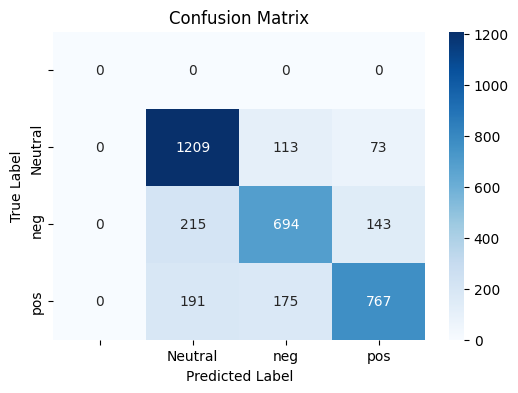

In [17]:
from sklearn.metrics import confusion_matrix

# Predict on the test data
y_pred = model.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


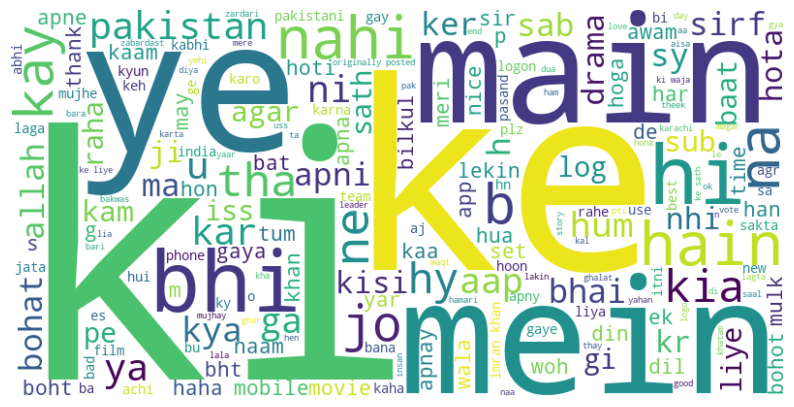

In [16]:
from wordcloud import WordCloud

# Combine all the cleaned text into one large string
all_text = ' '.join(df['clean_text'])

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
